In [1]:
%matplotlib  inline

In [2]:

import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

### Chargement des données

In [3]:
regres_data =  pd.read_csv('myregression.csv', index_col= 0)
regres_data.info()
print(regres_data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 11.7 KB
          X          y
0 -0.454228 -30.542363
1 -0.933831 -37.320518
2 -0.495779  -9.835616
3 -0.373339 -12.415292
4  0.046256  -2.921022
5 -0.183257  16.396584
6  0.066489  10.737742
7 -0.254530   0.226220
8  0.518925  10.640329
9 -2.374403 -58.432114


In [4]:
print(regres_data.head(10))


          X          y
0 -0.454228 -30.542363
1 -0.933831 -37.320518
2 -0.495779  -9.835616
3 -0.373339 -12.415292
4  0.046256  -2.921022
5 -0.183257  16.396584
6  0.066489  10.737742
7 -0.254530   0.226220
8  0.518925  10.640329
9 -2.374403 -58.432114


### Formatage

In [5]:
X = regres_data['X'].to_numpy()
print(X.shape)
X= X.reshape(-1,1)
print(X.shape)
y = regres_data['y'].to_numpy()
#y= y.reshape(-1,)
print(y.shape)

(500,)
(500, 1)
(500,)


###  Selection

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.8)
print(len(X_train) , len(X_test))

100 400


In [134]:
model =  SGDRegressor( learning_rate= 'constant', eta0 = 0.3 )

#### Prendre 2 points pour visualiser la droite 

In [127]:
droite = np.array([-4])
droite = droite.reshape(-1,1)
print(droite.shape)
droite2 = np.array([5])
droite2 = droite2.reshape(-1,1)
print(droite.shape)

(1, 1)
(1, 1)


### On trace estimation apres estimation

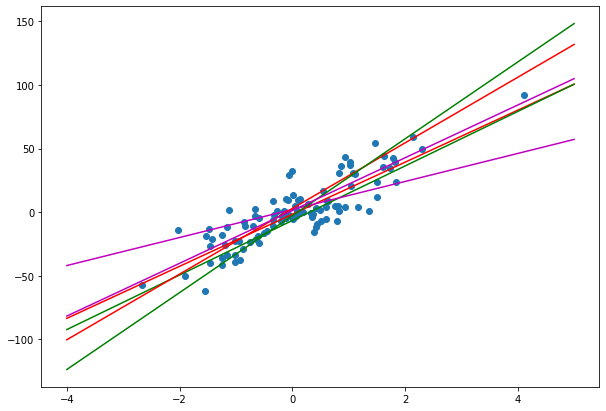

In [139]:

colors = [ 'r', 'g', 'm']
fig = plt.figure(figsize= (10, 7) )
for i in range(6):
    plt.ion
    mymod = model.partial_fit(X_train,y_train)
    plt.plot([-4, 5] ,[model.predict(droite), model.predict(droite2)] , color = colors[i % 3])
   
plt.scatter(X_train,y_train)    

### Estimation apres de fin de cycle

In [138]:
print(mymod.coef_, mymod.intercept_)

[10.44009027] [-4.25108615]
